### Imports ###

In [85]:
import os
import matplotlib.pyplot as plt
from skimage import color, filters, img_as_float, img_as_ubyte
from skimage.feature import blob_dog
import matplotlib.pyplot as plt

#### Read image paths to store them ####

In [2]:
images = []

In [3]:
def read_images_path(path, images_list):
    for x in os.listdir(path):
        path2 = os.path.join(path, x)
        if os.path.isdir(path2):
            read_images_path(path2, images_list)
        elif os.path.isfile(path2):
            images.append(path2)

In [4]:
os.getcwd()

'/Users/pati/Documents/Thesis/thesis/code'

In [5]:
read_images_path('../src/img', images)

In [6]:
import matplotlib.pyplot as plt

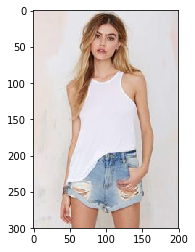

In [7]:
img = plt.imread(images[0])
plt.imshow(img)

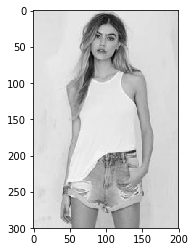

In [8]:
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')

In [103]:
def transform_dog(image_path, sigma):
    img = plt.imread(image_path)
    img = img_as_float(img)
    img_gray = color.rgb2gray(img)
    
    k = 1.8
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original Image')
    
    s1 = filters.gaussian(img_gray ,k*sigma)
    s2 = filters.gaussian(img_gray ,sigma)
    dog = (s1 - s2)
    dog = 255 - img_as_ubyte(dog)
    
    plt.subplot(1,2,2)
    plt.imshow(dog, cmap='gray')
    plt.title('DoG Image')
    plt.imsave('test.jpg', dog, cmap='gray')
    
    plt.show()

/Users/pati/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


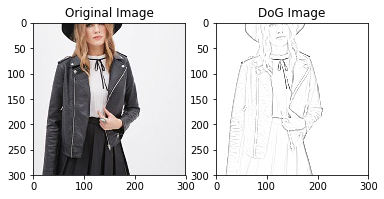

In [104]:
transform_dog(images[100], 0.8)

In [109]:
path2 = '..' + images[0].split('.')[-2] + '_dog.jpg'

In [110]:
path2

'../src/img/Marled_Knit_Racerback_Tank/img_00000002_dog.jpg'